In [ ]:
import cv2
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
from google.colab import files

In [ ]:
points = []

Needed if ipympl throws error

In [ ]:
!pip install --upgrade matplotlib ipympl

In [ ]:
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        print(f'Clicked point: ({x}, {y})')
        points.append([x, y, 1])

        plt.scatter(x, y, color='red')
        plt.draw()

        if len(points) == 4:
            print("Finished selecting points:")
            print(points)
            fig.canvas.mpl_disconnect(cid)

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

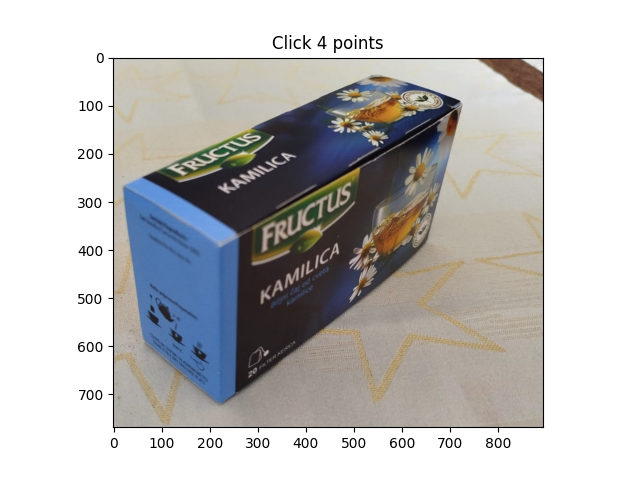

In [55]:
image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.imshow(image_rgb)
ax.set_title("Click 4 points")
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Import DLT function from first part of homework

In [ ]:
!curl -L -o DLT.ipynb https://raw.githubusercontent.com/VeljkoDeljanin/APGC-homework/main/homework-2/DLT.ipynb

In [ ]:
%run DLT.ipynb

In [ ]:
width = 490
height = 245

orig_pts = np.array(points)

img_pts = np.array([[0, 0, 1], [width - 1, 0, 1], [width - 1, height - 1, 1], [0, height - 1, 1]])

P = DLT(orig_pts, img_pts)

new_image = cv2.warpPerspective(image, P, (width, height))

from google.colab.patches import cv2_imshow
cv2_imshow(new_image)